In [4]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"pytorch version: {torch.__version__}, torchvision version: {torchvision.__version__}")

pytorch version: 2.8.0+cu128, torchvision version: 0.23.0+cu128


In [5]:
## load data
train_data = datasets.FashionMNIST(root='data', train=True, 
                                   download=True, transform=ToTensor(),
                                   target_transform=None
                                   )
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [6]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
image.shape

torch.Size([1, 28, 28])

In [8]:
# check how many samples
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [9]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, '9')

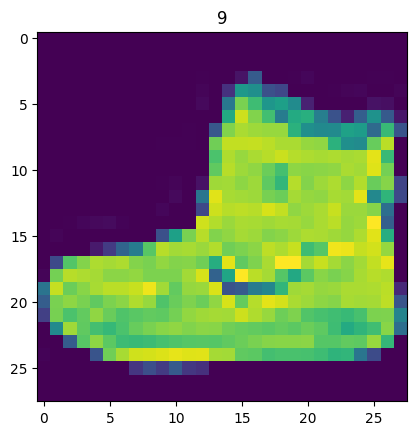

In [10]:
plt.imshow(image.squeeze())
plt.title(label)

Text(0.5, 1.0, 'Ankle boot')

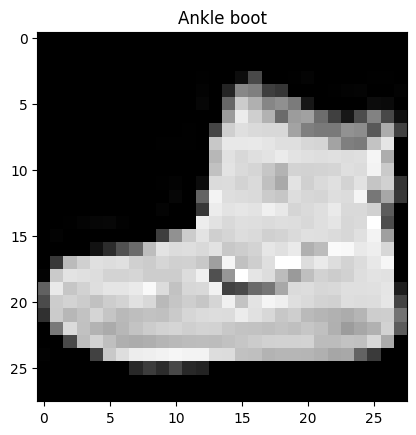

In [11]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

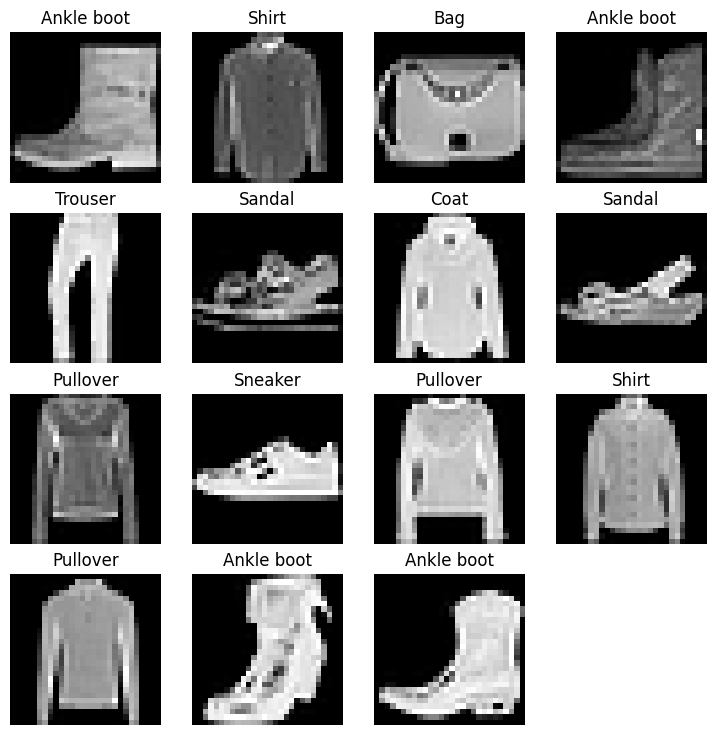

In [12]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows,cols = 4,4
for i in range(1, rows * cols * +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [13]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=True)

print(f"Dataloader: {train_dataloader,  test_dataloader}")
print(f"length of train dataloader: {len(train_dataloader)}, batches: {train_dataloader.batch_size}")
print(f"length of test dataloader: {len(test_dataloader)}, batch size:{test_dataloader.batch_size}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x7174c3cefe30>, <torch.utils.data.dataloader.DataLoader object at 0x7174c38d73b0>)
length of train dataloader: 1875, batches: 32
length of test dataloader: 313, batch size:32


In [14]:
train_feature_batch, train_labels_batch = next(iter(train_dataloader))
train_feature_batch.shape,  train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [15]:
flatten_model = nn.Flatten()

x = train_feature_batch[0]
output = flatten_model(x)

print(f"shape before flattening: {x.shape} -> [color_channel, height, width]")
print(f"shape after flattening: {output.shape} -> [color_channel, height * width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channel, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channel, height * width]


In [16]:
# build model

class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [17]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=784, hidden_units=10, output_shape=len(class_names))

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [18]:
from helper_functions import accuracy_fn, plot_decision_boundary,plot_predictions

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



In [19]:
from timeit import default_timer as timer

def print_train_time(start: float, end:float, device: torch.device=None):
    total_time = end - start
    print(f"train time on {device} : {total_time:3f} seconds")
    return total_time



In [20]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epoches = 3

for epoch in tqdm(range(epoches)):

    print(f"epuch: {epoch} \n")
    train_loss = 0
    for batch, (X,y) in enumerate(train_dataloader):
        model_0.train()

        y_pred= model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        if batch % 400 == 0:
            print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")
    train_loss /= len(train_data)

    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss = loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    print(f"\n Train loss:{train_loss:5f}, test_loss: {test_loss:5f}, test_acc: {test_acc: 2f}\n")

train_time_end_on_cpu = timer()

total_train_time = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device=next(model_0.parameters()).device)

  0%|          | 0/3 [00:00<?, ?it/s]

epuch: 0 

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train loss:0.018450, test_loss: 0.002231, test_acc:  82.038738

epuch: 1 

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train loss:0.014823, test_loss: 0.002147, test_acc:  81.679313

epuch: 2 

looked at 0/60000 samples
looked at 12800/60000 samples
looked at 25600/60000 samples
looked at 38400/60000 samples
looked at 51200/60000 samples

 Train loss:0.014177, test_loss: 0.002056, test_acc:  82.997204

train time on cpu : 47.377600 seconds


In [21]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader,
loss_fn: torch.nn.Module,
accuracy_fn):
    
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"module_name": model.__class__.__name__,"model_loss": loss.item(), "model_acc": acc}

model_0_results = eval_model(model=model_0,data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

print(model_0_results)

{'module_name': 'FashionMNISTModelV0', 'model_loss': 0.5119838714599609, 'model_acc': 83.02715654952077}


In [22]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [23]:
model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to("cpu")

next(model_1.parameters()).device


device(type='cpu')

In [24]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.1)


def train_step(model: torch.nn.Module,
                data_loader: DataLoader,
                loss_fn: nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = "cpu"
                ):
    train_loss, train_acc = 0 ,0
    model.to(device)
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {loss: 5f}, train accuracy: {train_acc: 2f}%")


def test_step(data_loader: DataLoader, model: nn.Module, loss_fn: nn.Module, accuracy_fn, device:torch.device= "cpu"):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f"test loss: {test_loss:5f}, test accuracu: {test_acc:2f}%")

In [25]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_on_cpu = timer()

epoches = 3

for epoch in tqdm(range(epoches)):
    print(f"epoch: {epoch}\n")

    train_step(data_loader=train_dataloader, model=model_1, loss_fn=loss_fn,optimizer=optimizer, accuracy_fn=accuracy_fn)

    test_step(data_loader=test_dataloader, model=model_1, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
train_time_end_on_cpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device="cpu")

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0

Train loss:  0.515149, train accuracy:  77.486667%
test loss: 0.588172, test accuracu: 79.422923%
epoch: 1

Train loss:  0.413036, train accuracy:  83.210000%
test loss: 0.552217, test accuracu: 80.750799%
epoch: 2

Train loss:  0.749674, train accuracy:  84.166667%
test loss: 0.477975, test accuracu: 83.366613%
train time on cpu : 63.754744 seconds


In [26]:
model_1_results = eval_model(model_1, data_loader=test_dataloader,loss_fn=loss_fn, accuracy_fn=accuracy_fn)

In [27]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()

        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units,kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 2, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units,hidden_units,3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        x = self.block_2(x)
        x = self.classifier(x)
        return x


torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=len(class_names))

model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_mmode_2 = timer()

epoches = 3

for epoch in tqdm(range(epoches)):
    print(f"Epoch: {epoch} \n")
    train_step(data_loader=train_dataloader,
               model=model_2,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device="cpu"
               )
    
    test_step(data_loader=test_dataloader,model=model_2, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device="cpu")

train_time_end_model_2 = timer()

total_time_train_model_2= print_train_time(start=train_time_start_mmode_2, end=train_time_end_model_2, device="cpu")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0 

Train loss:  0.349996, train accuracy:  77.115000%
test loss: 0.408455, test accuracu: 85.603035%
Epoch: 1 



In [ ]:
# model2_results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

model_2_results

{'module_name': 'FashionMNISTModelV2',
 'model_loss': 0.3291178345680237,
 'model_acc': 88.37859424920129}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])

compare_results

,module_name,model_loss,model_acc
0,FashionMNISTModelV0,0.507366,83.017173
1,FashionMNISTModelV1,0.480816,83.126997
2,FashionMNISTModelV2,0.329118,88.378594


In [ ]:
def make_predictions(model: nn.Module, data:list, device: torch.device="cpu"):
    pred_probs = []
    model.eval()

    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample,dim=0)
            pred_logit = model(sample)

            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    
    return torch.stack(pred_probs)

In [ ]:
import random

random.seed(42)
test_samples = []
test_labels = []

for sample,label in random.sample(list(test_data), k = 9):
    test_samples.append(sample)
    test_labels.append(label)

print(f"test sample shape: {test_samples[0].shape}, test sample labels: {test_labels[0]} ({class_names[test_labels[0]]})")

test sample shape: torch.Size([1, 28, 28]), test sample labels: 5 (Sandal)


In [ ]:
pred_probs = make_predictions(model=model_2, data=test_samples)

pred_probs[:2]

tensor([[2.1392e-05, 1.2705e-08, 4.6636e-08, 3.0199e-07, 2.3145e-08, 9.9608e-01,
         8.2892e-06, 2.8180e-04, 1.0403e-04, 3.5039e-03],
        [1.5973e-01, 3.6290e-01, 3.3383e-03, 3.8046e-01, 2.1443e-02, 2.7723e-04,
         6.9947e-02, 3.5358e-04, 9.5928e-04, 5.8705e-04]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)

pred_classes

tensor([5, 3, 7, 2, 3, 0, 4, 7, 1])

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 2, 3, 0, 4, 7, 1]))

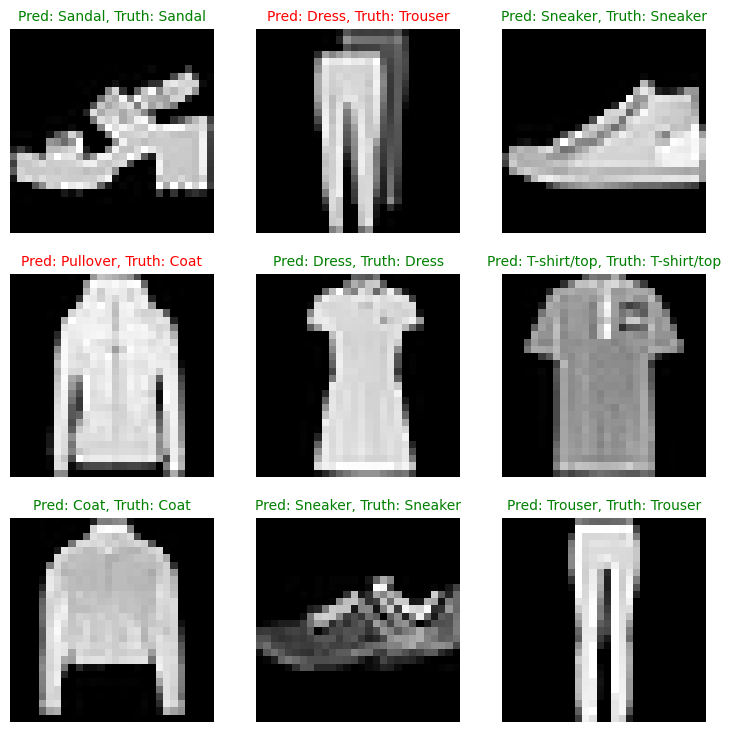

In [ ]:
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3

for i , sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)

    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label}, Truth: {truth_label}"

    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c='g')
    else:
        plt.title(title_text, fontsize=10, c='r')
    
    plt.axis(False)

In [ ]:
# save mode to disk
from pathlib import Path
import torch

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "03_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

print(f"saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

saving model to :models/03_vision_model_2.pth


NameError: name 'model_2' is not defined

In [ ]:
## load model

load_model_2 = FashionMNISTModelV2(input_shape=1, hidden_units=10, output_shape=10)

load_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

load_model_2 = load_model_2.to("cpu")

In [ ]:
## evaluate model
torch.manual_seed(42)

load_model_2_results = eval_model(
    model=load_model_2,
    data_loader = test_dataloader,
    loss_fn = loss_fn,
    accuracy_fn = accuracy_fn
)

load_model_2_results